In [ ]:
# Mounting Gdrive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.mirrors.pair.com/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!df -h 
!tar -xvf spark-2.4.5-bin-hadoop2.7.tgz

!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   32G   71G  31% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       114G   33G   82G  29% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           108G   41G   68G  38% /content/drive
spark-2.4.5-bin-hadoop2.7/
spark-2.4.5-bin-hadoop2.7/licenses/
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-jtransforms.html
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd-jni.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-xmlenc.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-vis.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-spire.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sorttable.js.txt
spark-2.4.5-bin-ha

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Setting the working Directory
os.chdir("/content/drive/")
!ls

'My Drive'  'Shared drives'


In [ ]:
# read data
#load ratings data from the MovieLens dataset, each row consisting of a user, a movie, a rating and a timestamp
raw_data = spark.read.csv("/content/drive/My Drive/Colab_Datasets/raw.csv",header = True)


In [ ]:
raw_data.show(5)

+--------------------+--------------------+-------------------+------------+----------------+----------------------+----+---+------------------+----------+----------------------+------------+-------------------------+--------------------------+------------------------------+-------------------------------------+-------------------+---------------------+------------------------+-------------------------+-----------------------------+------------------------------------+--------------------+
|             trip_id|trip_start_timestamp| trip_end_timestamp|trip_seconds|      trip_miles|dropoff_community_area|fare|tip|additional_charges|trip_total|shared_trip_authorized|trips_pooled|dropoff_centroid_latitude|dropoff_centroid_longitude|dropoff_centroid_location.type|dropoff_centroid_location.coordinates|pickup_census_tract|pickup_community_area|pickup_centroid_latitude|pickup_centroid_longitude|pickup_centroid_location.type|pickup_centroid_location.coordinates|dropoff_census_tract|
+---------

In [ ]:
## Dropping a few columns
columns_to_drop = ['dropoff_centroid_location.type','dropoff_centroid_location.coordinates','pickup_centroid_location.type',
                   'pickup_centroid_location.coordinates']
raw2= raw_data.drop(*columns_to_drop)

In [ ]:
raw3 = raw2.na.drop()
raw3.count()

1210905

In [ ]:
# Variables listed in our data

raw3.schema.names

['trip_id',
 'trip_start_timestamp',
 'trip_end_timestamp',
 'trip_seconds',
 'trip_miles',
 'dropoff_community_area',
 'fare',
 'tip',
 'additional_charges',
 'trip_total',
 'shared_trip_authorized',
 'trips_pooled',
 'dropoff_centroid_latitude',
 'dropoff_centroid_longitude',
 'pickup_census_tract',
 'pickup_community_area',
 'pickup_centroid_latitude',
 'pickup_centroid_longitude',
 'dropoff_census_tract']

In [ ]:
## Checking the data type of each column
raw3.dtypes

[('trip_id', 'string'),
 ('trip_start_timestamp', 'string'),
 ('trip_end_timestamp', 'string'),
 ('trip_seconds', 'string'),
 ('trip_miles', 'string'),
 ('dropoff_community_area', 'string'),
 ('fare', 'string'),
 ('tip', 'string'),
 ('additional_charges', 'string'),
 ('trip_total', 'string'),
 ('shared_trip_authorized', 'string'),
 ('trips_pooled', 'string'),
 ('dropoff_centroid_latitude', 'string'),
 ('dropoff_centroid_longitude', 'string'),
 ('pickup_census_tract', 'string'),
 ('pickup_community_area', 'string'),
 ('pickup_centroid_latitude', 'string'),
 ('pickup_centroid_longitude', 'string'),
 ('dropoff_census_tract', 'string')]

In [ ]:
## Checking for missing values in each column

names = raw3.schema.names
for i in names:
    print(i + ': ' + str(raw3[(raw3[i]=='NA') | (raw3[i]=='NULL')].count()))

trip_id: 0
trip_start_timestamp: 0
trip_end_timestamp: 0
trip_seconds: 0
trip_miles: 1
dropoff_community_area: 87659
fare: 0
tip: 0
additional_charges: 0
trip_total: 0
shared_trip_authorized: 0
trips_pooled: 0
dropoff_centroid_latitude: 86902
dropoff_centroid_longitude: 86902
pickup_census_tract: 413689
pickup_community_area: 82342
pickup_centroid_latitude: 81744
pickup_centroid_longitude: 81744
dropoff_census_tract: 415936


In [ ]:
raw3.describe().show()

+-------+--------------------+--------------------+-------------------+------------------+------------------+----------------------+------------------+------------------+------------------+------------------+----------------------+------------------+-------------------------+--------------------------+--------------------+---------------------+------------------------+-------------------------+--------------------+
|summary|             trip_id|trip_start_timestamp| trip_end_timestamp|      trip_seconds|        trip_miles|dropoff_community_area|              fare|               tip|additional_charges|        trip_total|shared_trip_authorized|      trips_pooled|dropoff_centroid_latitude|dropoff_centroid_longitude| pickup_census_tract|pickup_community_area|pickup_centroid_latitude|pickup_centroid_longitude|dropoff_census_tract|
+-------+--------------------+--------------------+-------------------+------------------+------------------+----------------------+------------------+-----------

In [ ]:
## Plot 1

In [ ]:
count = [item[1] for item in raw3.groupBy('fare').count().collect()]
fare = [item[0] for item in raw3.groupBy('fare').count().collect()]
fare_amount = {"count":count, 'fare' : fare}

fare_amount = pd.DataFrame(fare_amount)
# fare_amount_hdf = fare_amount.toHandy()
fare_amount2 = fare_amount.sort_values(by = ["fare"], ascending = True)
fare_amount2['fare'] = pd.to_numeric(fare_amount2['fare'], downcast='float')
fare_amount2.head()

,count,fare
23,13976,0.0
78,163442,10.0
33,44,100.0
31,38,102.5
74,38,105.0


In [ ]:
fare_amount2.dtypes

count      int64
fare     float32
dtype: object

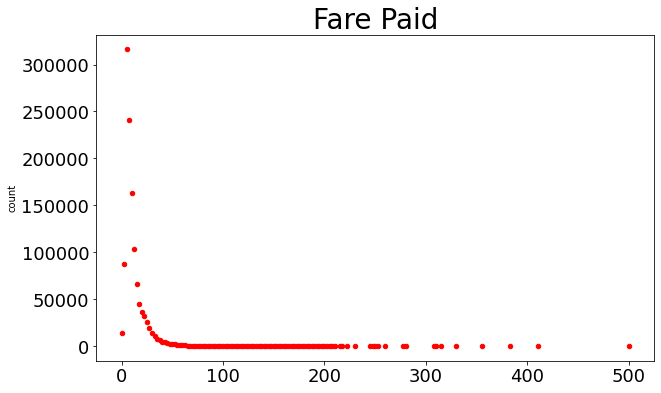

In [ ]:
fare_amount2.plot(figsize = (10,6), kind = "scatter", color = "red",
                               x = "fare", y = "count", legend = False)
plt.xlabel("", fontsize = 18)
# plt.ylabel("Fare", fontsize = 18)
plt.title("Fare Paid", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [ ]:
zero_fare = raw3[raw3['fare']== 0].count()

In [ ]:
# Plot 2

In [ ]:
count2 = [item[1] for item in raw3.groupBy('trip_seconds').count().collect()]
trip_seconds = [item[0] for item in raw3.groupBy('trip_seconds').count().collect()]
trip_time = {"count":count2, 'trip_seconds' : trip_seconds}

trip_time = pd.DataFrame(trip_time)
trip_time = trip_time.sort_values(by = "trip_seconds")
trip_time['trip_seconds'] = pd.to_numeric(trip_time['trip_seconds'], downcast='float')

trip_time.tail()

,count,trip_seconds
604,679,995.0
4694,634,996.0
5235,1,9964.0
1650,1212,997.0
1654,639,999.0


In [ ]:
trip_time.dtypes

count             int64
trip_seconds    float32
dtype: object

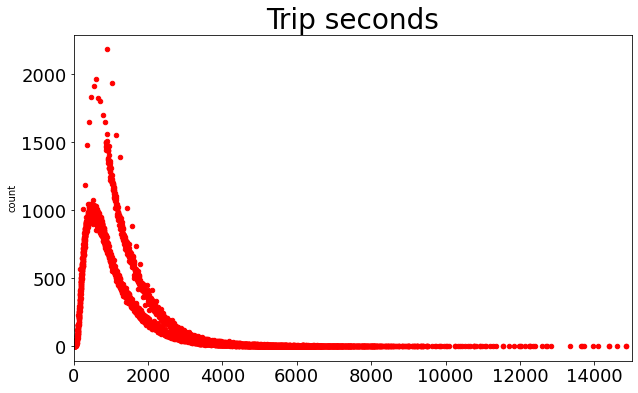

In [ ]:
trip_time.plot(figsize = (10,6), kind = 'scatter', color = "red", 
                               x = "trip_seconds", y = "count", legend = False)
plt.xlabel("", fontsize = 18)
# plt.ylabel("Fare", fontsize = 18)
plt.title("Trip seconds", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlim(0,15000)
plt.show()

In [ ]:
# Plot 3

In [ ]:
tripmiles_withoutna = raw3[raw3['trip_miles']!= 'NA']
tripmiles_withoutna.count()

1210904

In [ ]:
count3 = [item[1] for item in tripmiles_withoutna.groupBy('trip_miles').count().collect()]
trip_miles = [item[0] for item in tripmiles_withoutna.groupBy('trip_miles').count().collect()]
trip_miles_data = {"count":count3, 'trip_miles' : trip_miles}

trip_miles_data = pd.DataFrame(trip_miles_data)
trip_miles_data = trip_miles_data.sort_values(by = "trip_miles")
trip_miles_data['trip_miles'] = pd.to_numeric(trip_miles_data['trip_miles'], downcast='float')


trip_miles_data.head()

,count,trip_miles
158682,64,0.000000
189817,1,0.000005
112882,1,0.000005
203631,1,0.000005
880658,1,0.000009


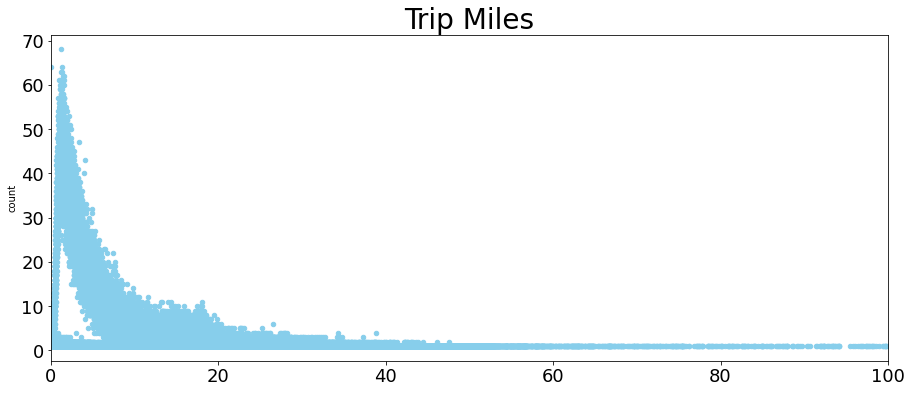

In [ ]:
trip_miles_data.plot(figsize = (15,6), kind = 'scatter', color = "skyblue", 
                               x = "trip_miles", y = "count", legend = False)
plt.xlabel("", fontsize = 18)
# plt.ylabel("Fare", fontsize = 18)
plt.title("Trip Miles", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlim(0,100)
plt.show()

In [ ]:
## Extracting Weekdays
## PLot 4

In [ ]:
from pyspark.sql.functions import col, udf, to_timestamp, date_format

In [ ]:
from pyspark.sql.functions import date_format
week_sub = raw3.select('trip_start_timestamp', date_format('trip_start_timestamp', 'u').alias('Weekday_number'), date_format('trip_start_timestamp', 'E').alias('DayOfWeek'))
week_sub.show()

+--------------------+--------------+---------+
|trip_start_timestamp|Weekday_number|DayOfWeek|
+--------------------+--------------+---------+
| 2018-11-20 08:45:00|             2|      Tue|
| 2018-11-22 01:45:00|             4|      Thu|
| 2018-11-22 19:00:00|             4|      Thu|
| 2018-11-20 15:30:00|             2|      Tue|
| 2018-11-22 20:30:00|             4|      Thu|
| 2018-11-20 05:30:00|             2|      Tue|
| 2018-11-21 14:00:00|             3|      Wed|
| 2018-11-21 22:15:00|             3|      Wed|
| 2018-11-21 04:15:00|             3|      Wed|
| 2018-11-21 20:45:00|             3|      Wed|
| 2018-11-22 01:45:00|             4|      Thu|
| 2018-11-19 18:30:00|             1|      Mon|
| 2018-11-20 19:45:00|             2|      Tue|
| 2018-11-19 19:00:00|             1|      Mon|
| 2018-11-22 12:00:00|             4|      Thu|
| 2018-11-20 10:15:00|             2|      Tue|
| 2018-11-23 13:45:00|             5|      Fri|
| 2018-11-20 17:30:00|             2|   

In [ ]:
count4 = [item[1] for item in week_sub.groupBy('DayOfWeek').count().collect()]
DayOfWeek = [item[0] for item in week_sub.groupBy('DayOfWeek').count().collect()]
DayOfWeek_data = {"count":count4, 'DayOfWeek' : DayOfWeek}

DayOfWeek_data = pd.DataFrame(DayOfWeek_data)
DayOfWeek_data

,count,DayOfWeek
0,247000,Mon
1,195991,Thu
2,280937,Wed
3,261499,Tue
4,225478,Fri


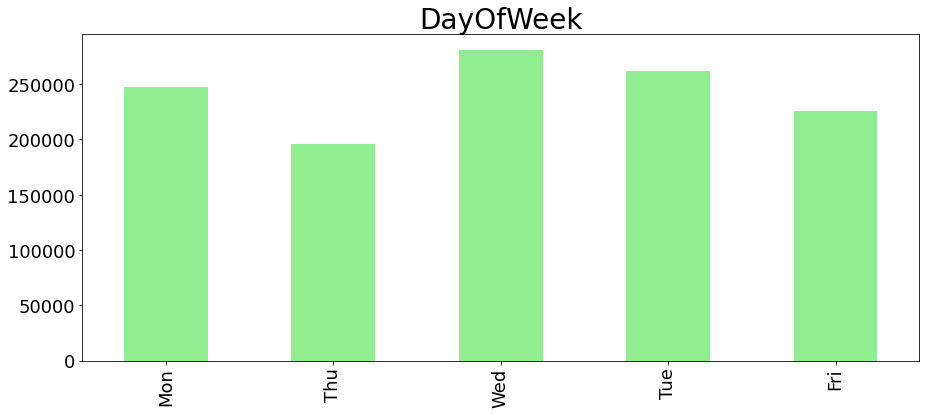

In [ ]:
DayOfWeek_data.plot(figsize = (15,6), kind = 'bar', color = "lightgreen", 
                               x = "DayOfWeek", y = "count", legend = False)
plt.xlabel("", fontsize = 18)
# plt.ylabel("Fare", fontsize = 18)
plt.title("DayOfWeek", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [ ]:
## Plot 5

In [ ]:
from pyspark.sql.functions import month
month_sub = raw3.select('trip_start_timestamp', month('trip_start_timestamp').alias('month'))
month_sub.show()


+--------------------+-----+
|trip_start_timestamp|month|
+--------------------+-----+
| 2018-11-20 08:45:00|   11|
| 2018-11-22 01:45:00|   11|
| 2018-11-22 19:00:00|   11|
| 2018-11-20 15:30:00|   11|
| 2018-11-22 20:30:00|   11|
| 2018-11-20 05:30:00|   11|
| 2018-11-21 14:00:00|   11|
| 2018-11-21 22:15:00|   11|
| 2018-11-21 04:15:00|   11|
| 2018-11-21 20:45:00|   11|
| 2018-11-22 01:45:00|   11|
| 2018-11-19 18:30:00|   11|
| 2018-11-20 19:45:00|   11|
| 2018-11-19 19:00:00|   11|
| 2018-11-22 12:00:00|   11|
| 2018-11-20 10:15:00|   11|
| 2018-11-23 13:45:00|   11|
| 2018-11-20 17:30:00|   11|
| 2018-11-23 18:30:00|   11|
| 2018-11-23 19:45:00|   11|
+--------------------+-----+
only showing top 20 rows



In [ ]:
count5 = [item[1] for item in month_sub.groupBy('month').count().collect()]
month_data = [item[0] for item in month_sub.groupBy('month').count().collect()]
month_data2 = {"count":count5, 'month' : month_data}

month_data2 = pd.DataFrame(month_data2)
month_data2

,count,month
0,1210905,11


In [ ]:
## Creating trip mins variable

from pyspark.sql import functions as F
timeFmt = "yyyy-MM-dd HH:mm:ss"
timeDiff = (F.unix_timestamp('trip_end_timestamp', format=timeFmt)
            - F.unix_timestamp('trip_start_timestamp', format=timeFmt))
raw3 = raw3.withColumn("Duration", timeDiff)
#convert seconds to minute and round the seconds for further use. 
raw3 = raw3.withColumn("Duration_minutes",F.round(raw3.Duration / 60.0))

In [ ]:
## Scatterplot matrix

pd.plotting.scatter_matrix(frame = raw3[['fare', 'trip_miles', 'Duration_minutes']], figsize=(7,7));

In [ ]:
## Creating the trip hours variable from trip seconds

In [ ]:
from pyspark.sql.functions import *

raw4 = raw3.withColumn("trip_hours", round(col('trip_seconds')/3600,2))

In [ ]:
raw4.show()

+--------------------+--------------------+-------------------+------------+----------------+----------------------+----+---+------------------+----------+----------------------+------------+-------------------------+--------------------------+-------------------+---------------------+------------------------+-------------------------+--------------------+--------+----------------+----------+
|             trip_id|trip_start_timestamp| trip_end_timestamp|trip_seconds|      trip_miles|dropoff_community_area|fare|tip|additional_charges|trip_total|shared_trip_authorized|trips_pooled|dropoff_centroid_latitude|dropoff_centroid_longitude|pickup_census_tract|pickup_community_area|pickup_centroid_latitude|pickup_centroid_longitude|dropoff_census_tract|Duration|Duration_minutes|trip_hours|
+--------------------+--------------------+-------------------+------------+----------------+----------------------+----+---+------------------+----------+----------------------+------------+-----------------

In [ ]:
trip_hours = pd.DataFrame(raw4['trip_hours'])

In [ ]:
raw4.show()

+--------------------+--------------------+-------------------+------------+----------------+----------------------+----+---+------------------+----------+----------------------+------------+-------------------------+--------------------------+-------------------+---------------------+------------------------+-------------------------+--------------------+--------+----------------+----------+
|             trip_id|trip_start_timestamp| trip_end_timestamp|trip_seconds|      trip_miles|dropoff_community_area|fare|tip|additional_charges|trip_total|shared_trip_authorized|trips_pooled|dropoff_centroid_latitude|dropoff_centroid_longitude|pickup_census_tract|pickup_community_area|pickup_centroid_latitude|pickup_centroid_longitude|dropoff_census_tract|Duration|Duration_minutes|trip_hours|
+--------------------+--------------------+-------------------+------------+----------------+----------------------+----+---+------------------+----------+----------------------+------------+-----------------

In [ ]:
## Creating a time column

from pyspark.sql.functions import unix_timestamp

raw4 = raw3.withColumn("Time", unix_timestamp("trip_start_timestamp", "yyyy-MM-dd HH:mm:ss").cast("timestamp"))
raw4.show(5)

+--------------------+--------------------+-------------------+------------+----------------+----------------------+----+---+------------------+----------+----------------------+------------+-------------------------+--------------------------+-------------------+---------------------+------------------------+-------------------------+--------------------+--------+----------------+-------------------+
|             trip_id|trip_start_timestamp| trip_end_timestamp|trip_seconds|      trip_miles|dropoff_community_area|fare|tip|additional_charges|trip_total|shared_trip_authorized|trips_pooled|dropoff_centroid_latitude|dropoff_centroid_longitude|pickup_census_tract|pickup_community_area|pickup_centroid_latitude|pickup_centroid_longitude|dropoff_census_tract|Duration|Duration_minutes|               Time|
+--------------------+--------------------+-------------------+------------+----------------+----------------------+----+---+------------------+----------+----------------------+------------

In [ ]:
## Subsetting our variables for modelling

cols = ['trip_seconds','trip_miles','fare','additional_charges','shared_trip_authorized','trips_pooled','Time']
raw4_sub = raw4.select(*cols)
raw4_pandas = raw4_sub.toPandas()

In [ ]:
raw4_pandas.head(5)

,trip_seconds,trip_miles,fare,additional_charges,shared_trip_authorized,trips_pooled,Time
0,4456,45.4023171060767,45,4.68,TRUE,2,2018-11-20 08:45:00
1,1936,17.2836038832714,25,2.5,FALSE,1,2018-11-22 01:45:00
2,872,4.35413696496574,10,2.5,FALSE,1,2018-11-22 19:00:00
3,2534,14.7251322264203,25,7.5,FALSE,1,2018-11-20 15:30:00
4,2158,17.9192045208773,15,2.5,TRUE,2,2018-11-22 20:30:00


In [ ]:
## Creating the session varaible from the Time variable

raw4_pandas=raw4_pandas.assign(session=pd.cut(raw4_pandas.Time.dt.hour, [0,6,12,18,23], labels=['Night','Morning','Afternoon','Evening'], include_lowest=True))
raw4_pandas.head()

,trip_seconds,trip_miles,fare,additional_charges,shared_trip_authorized,trips_pooled,Time,session
0,4456,45.4023171060767,45,4.68,TRUE,2,2018-11-20 08:45:00,Morning
1,1936,17.2836038832714,25,2.5,FALSE,1,2018-11-22 01:45:00,Night
2,872,4.35413696496574,10,2.5,FALSE,1,2018-11-22 19:00:00,Evening
3,2534,14.7251322264203,25,7.5,FALSE,1,2018-11-20 15:30:00,Afternoon
4,2158,17.9192045208773,15,2.5,TRUE,2,2018-11-22 20:30:00,Evening


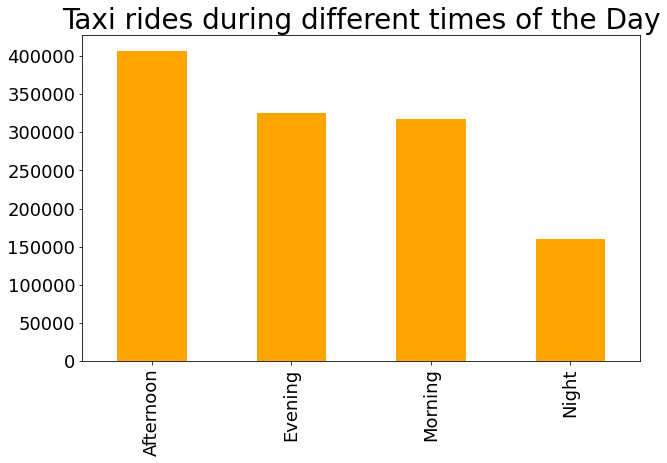

In [ ]:
##Plotting

raw4_pandas['session'].value_counts().plot(figsize = (10,6), kind = 'bar', color = 'orange')

plt.xlabel("", fontsize = 18)
# plt.ylabel("Fare", fontsize = 18)
plt.title("Taxi rides during different times of the Day", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [ ]:
raw4_pandas.columns

Index(['trip_seconds', 'trip_miles', 'fare', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'Time', 'session'],
      dtype='object')

In [ ]:
## Removing na values, Dummifying shared trips

raw4_pandas_withoutna = raw4_pandas[raw4_pandas['trip_miles']!= 'NA']
raw4_pandas_withoutna['shared_trip_authorized'] = pd.get_dummies(raw4_pandas_withoutna['shared_trip_authorized'], drop_first=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
raw4_pandas_withoutna.dtypes

trip_seconds                      object
trip_miles                        object
fare                              object
additional_charges                object
shared_trip_authorized             uint8
trips_pooled                      object
Time                      datetime64[ns]
session                         category
dtype: object

In [ ]:
## converting all string types to numeric for our analysis

num_cols = ['trip_seconds', 'trip_miles', 'fare', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled']
raw4_pandas_withoutna[num_cols] = raw4_pandas_withoutna[num_cols].apply(pd.to_numeric)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
raw4_pandas_withoutna.head()

,trip_seconds,trip_miles,fare,additional_charges,shared_trip_authorized,trips_pooled,Time,session
0,4456,45.402317,45.0,4.68,1,2,2018-11-20 08:45:00,Morning
1,1936,17.283604,25.0,2.50,0,1,2018-11-22 01:45:00,Night
2,872,4.354137,10.0,2.50,0,1,2018-11-22 19:00:00,Evening
3,2534,14.725132,25.0,7.50,0,1,2018-11-20 15:30:00,Afternoon
4,2158,17.919205,15.0,2.50,1,2,2018-11-22 20:30:00,Evening


In [ ]:
raw4_pandas_withoutna.dtypes

trip_seconds                       int64
trip_miles                       float64
fare                             float64
additional_charges               float64
shared_trip_authorized             uint8
trips_pooled                       int64
Time                      datetime64[ns]
session                         category
dtype: object

In [ ]:
raw4_pandas_withoutna['trip_miles'] = round(raw4_pandas_withoutna['trip_miles'],2)

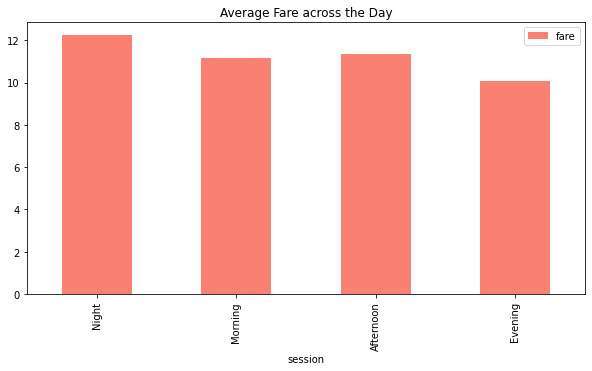

In [ ]:
raw4_pandas_withoutna.groupby('session').agg({'fare':'mean'}).reset_index().plot(kind = 'bar', x = 'session', y = 'fare'
,color = 'salmon', figsize = (10,5), title = "Average Fare across the Day")

In [ ]:
## Dummifying the newly created session variable

raw4_pandas_withoutna_dummies= pd.get_dummies(data = raw4_pandas_withoutna, columns = ['session'], drop_first=True, prefix = 'session')
raw4_pandas_withoutna_dummies.head()


,trip_seconds,trip_miles,fare,additional_charges,shared_trip_authorized,trips_pooled,Time,session_Morning,session_Afternoon,session_Evening
0,4456,45.402317,45.0,4.68,1,2,2018-11-20 08:45:00,1,0,0
1,1936,17.283604,25.0,2.50,0,1,2018-11-22 01:45:00,0,0,0
2,872,4.354137,10.0,2.50,0,1,2018-11-22 19:00:00,0,0,1
3,2534,14.725132,25.0,7.50,0,1,2018-11-20 15:30:00,0,1,0
4,2158,17.919205,15.0,2.50,1,2,2018-11-22 20:30:00,0,0,1


In [ ]:
raw4_pandas_withoutna_dummies.dtypes

trip_seconds                       int64
trip_miles                       float64
fare                             float64
additional_charges               float64
shared_trip_authorized             uint8
trips_pooled                       int64
Time                      datetime64[ns]
session_Morning                    uint8
session_Afternoon                  uint8
session_Evening                    uint8
dtype: object

In [ ]:
raw4_pandas_withoutna_dummies.columns

Index(['trip_seconds', 'trip_miles', 'fare', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'Time', 'session_Morning',
       'session_Afternoon', 'session_Evening'],
      dtype='object')

In [ ]:
## Converting our dataframe back to a spark dataframe

reg_spark_frame = spark.createDataFrame(raw4_pandas_withoutna_dummies)
reg_spark_frame.count()

1210904

In [ ]:
## Linear Regression

In [ ]:
cols2 = ['trip_seconds','trip_miles','additional_charges','shared_trip_authorized','trips_pooled',
         'session_Morning','session_Afternoon', 'session_Evening']

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=cols2,outputCol="features")
data_2 = assembler.transform(reg_spark_frame)

In [ ]:
## Splitting into test and train

splits = data_2.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', 
                      labelCol='fare')
lr_model = lr.fit(train_df)


In [ ]:
lr_model.intercept

5.292581396491225

In [ ]:
## test prediction

prediction = lr_model.transform(test_df)

In [ ]:
## Evaluating our model

from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="fare", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(prediction)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(prediction, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(prediction, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(prediction, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 3.522
MSE: 12.406
MAE: 1.795
r2: 0.862
